In [20]:
!pip install prophet
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [21]:
import plotly.io as pio
pio.renderers.default='colab'

In [22]:
df = pd.read_csv('tsla_data.csv')
df.head()

,date,open,high,low,close,volume,raw_close,change_percent,avg_vol_20d
0,02/01/2020,28.30000,28.71304,28.11400,28.68400,143375784,430.2600,2.85,153126135.0
1,03/01/2020,29.36666,30.26666,29.12800,29.53400,266920473,443.0100,2.96,162319968.4
2,06/01/2020,29.36466,30.10400,29.33334,30.10266,152362493,451.5399,1.93,167135361.1
3,07/01/2020,30.76000,31.44200,30.22366,31.27066,273137103,469.0599,3.88,175078013.8
4,08/01/2020,31.58000,33.23266,31.21534,32.80934,467990844,492.1401,4.92,191697393.5


In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1078 non-null   object 
 1   open            1078 non-null   float64
 2   high            1078 non-null   float64
 3   low             1078 non-null   float64
 4   close           1078 non-null   float64
 5   volume          1078 non-null   int64  
 6   raw_close       1078 non-null   float64
 7   change_percent  1078 non-null   float64
 8   avg_vol_20d     1078 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 75.9+ KB


,open,high,low,close,volume,raw_close,change_percent,avg_vol_20d
count,1078.000000,1078.000000,1078.000000,1078.000000,1.078000e+03,1078.000000,1078.000000,1.078000e+03
mean,208.042984,212.807503,202.999483,207.953595,1.312146e+08,577.978379,0.251911,1.318646e+08
std,83.368845,85.079219,81.421111,83.180977,8.619503e+07,364.633836,4.217742,6.956584e+07
min,24.979800,26.990660,23.367340,24.081340,2.940167e+07,108.100000,-21.060000,4.826728e+07
25%,165.736667,169.715000,161.665833,166.167500,7.897416e+07,237.430000,-2.020000,8.503656e+07
50%,220.030000,224.604900,214.315000,219.475000,1.065094e+08,605.785000,0.195000,1.105602e+08
75%,259.422500,265.192500,254.782500,259.932500,1.511134e+08,804.435075,2.257500,1.621515e+08
max,411.470000,414.496667,405.666667,409.970000,9.140814e+08,2238.750000,19.890000,3.886315e+08


In [24]:
#Data Visualizayion using ploty express
#line graph, Area graph, Box plot
px.area(df,x='date',y='close')

In [25]:
px.line(df,x='date',y='close')

In [26]:
px.area(df,x='date',y='volume')

In [27]:
px.bar(df,y='volume')

In [28]:
px.box(df,y='close')

In [29]:
#Data Preperation
columns = ['date','close']
ndf = pd.DataFrame(df,columns=columns)
ndf

,date,close
0,02/01/2020,28.68400
1,03/01/2020,29.53400
2,06/01/2020,30.10266
3,07/01/2020,31.27066
4,08/01/2020,32.80934
...,...,...
1073,09/04/2024,176.88000
1074,10/04/2024,171.76000
1075,11/04/2024,174.60000
1076,12/04/2024,171.05000


In [33]:
#Prophet doesn't know Data column name so rename as ds & y
ndf['date'] = pd.to_datetime(ndf['date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
prophet_df = ndf.rename(columns={'date':'ds','close':'y'})
prophet_df

,ds,y
0,2020-01-02,28.68400
1,2020-01-03,29.53400
2,2020-01-06,30.10266
3,2020-01-07,31.27066
4,2020-01-08,32.80934
...,...,...
1073,2024-04-09,176.88000
1074,2024-04-10,171.76000
1075,2024-04-11,174.60000
1076,2024-04-12,171.05000


In [34]:
#Create Prophet
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn0kmywr_/2ihw0dir.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn0kmywr_/ljbv6fd_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67907', 'data', 'file=/tmp/tmpn0kmywr_/2ihw0dir.json', 'init=/tmp/tmpn0kmywr_/ljbv6fd_.json', 'output', 'file=/tmp/tmpn0kmywr_/prophet_model4zd5cldi/prophet_model-20250103082008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:20:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:20:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast
#the last column 'yhat' is the predicted value

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,11.851044,-7.607477,67.087451,11.851044,11.851044,18.100248,18.100248,18.100248,-3.819842,-3.819842,-3.819842,21.920090,21.920090,21.920090,0.0,0.0,0.0,29.951291
1,2020-01-03,12.361848,-8.936937,66.203796,12.361848,12.361848,18.395244,18.395244,18.395244,-4.309794,-4.309794,-4.309794,22.705037,22.705037,22.705037,0.0,0.0,0.0,30.757092
2,2020-01-06,13.894261,0.404868,76.100534,13.894261,13.894261,22.090914,22.090914,22.090914,-2.381417,-2.381417,-2.381417,24.472331,24.472331,24.472331,0.0,0.0,0.0,35.985175
3,2020-01-07,14.405065,0.270475,73.647766,14.405065,14.405065,21.654444,21.654444,21.654444,-3.151868,-3.151868,-3.151868,24.806313,24.806313,24.806313,0.0,0.0,0.0,36.059510
4,2020-01-08,14.915869,-0.105728,74.765409,14.915869,14.915869,22.095278,22.095278,22.095278,-2.895976,-2.895976,-2.895976,24.991254,24.991254,24.991254,0.0,0.0,0.0,37.011147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,2024-05-11,191.328303,120.569327,197.890686,190.564935,191.938862,-32.230965,-32.230965,-32.230965,8.279439,8.279439,8.279439,-40.510404,-40.510404,-40.510404,0.0,0.0,0.0,159.097338
1104,2024-05-12,191.174468,119.754616,195.254609,190.372736,191.844721,-33.576130,-33.576130,-33.576130,8.279458,8.279458,8.279458,-41.855588,-41.855588,-41.855588,0.0,0.0,0.0,157.598337
1105,2024-05-13,191.020632,109.141467,183.855720,190.155606,191.814100,-45.451869,-45.451869,-45.451869,-2.381417,-2.381417,-2.381417,-43.070452,-43.070452,-43.070452,0.0,0.0,0.0,145.568764
1106,2024-05-14,190.866797,106.505352,181.057712,189.856073,191.775837,-47.292314,-47.292314,-47.292314,-3.151868,-3.151868,-3.151868,-44.140445,-44.140445,-44.140445,0.0,0.0,0.0,143.574483


In [36]:
#Vistualize 'yhat' - the predicted value
px.line(forecast,x='ds',y='yhat')

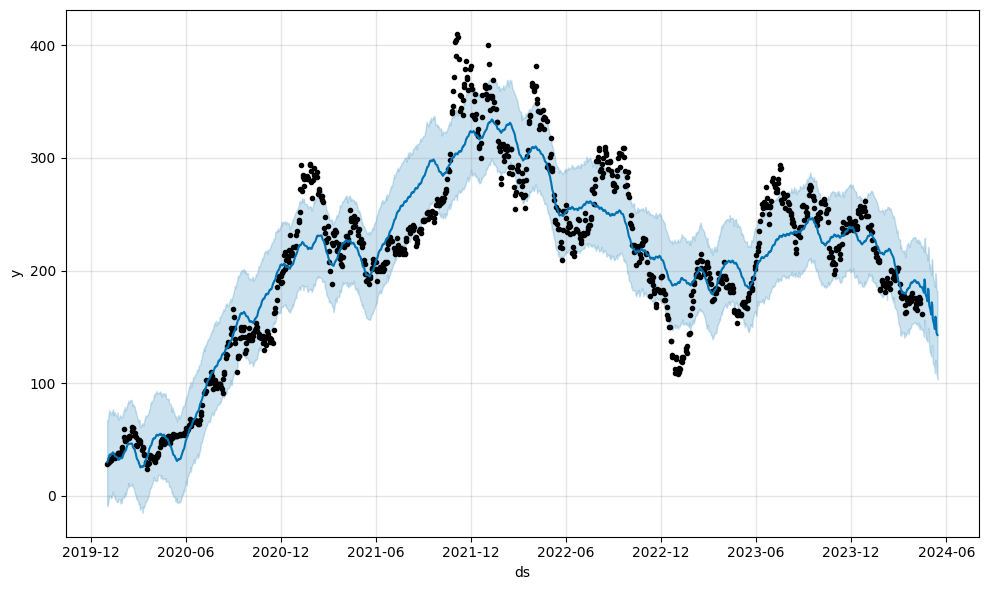

In [37]:
figure = m.plot(forecast,xlabel='ds',ylabel='y')

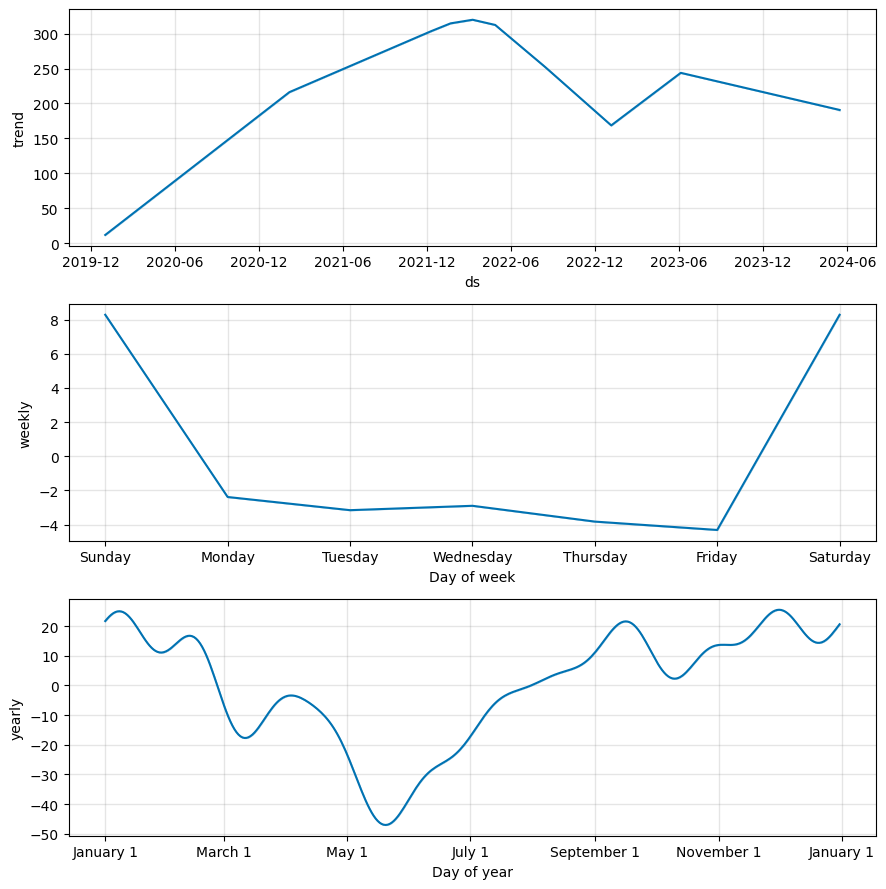

In [38]:
 figure2 = m.plot_components(forecast)

In [39]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>